In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("E:\CAR\car.csv")

In [3]:
data.head(5)

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
#Numerical values
#Missing Values

In [5]:
col_names = ["buying","maint","doors","persons","lug_boot","safety","class"]
data.columns = col_names

In [6]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
data["persons"].value_counts()

persons
4       576
more    576
2       575
Name: count, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
for col in col_names:
    print(data[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [10]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [11]:
X = data.drop(["class"],axis = 1)
y = data["class"]

In [12]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high


In [13]:
#Split data into separate training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_test,y_train = train_test_split(X,y,test_size = 0.3)

In [14]:
data.shape[0]*0.7

1208.8999999999999

In [15]:
data.shape[0]*0.3

518.1

In [16]:
X_train.shape,X_test.shape

((1208, 6), (519, 6))

In [17]:
#Feature Engineering 
#Feature Engineering means to tranforms features for better feature 

In [18]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
14,vhigh,vhigh,2,4,big,low
978,med,high,2,2,big,med
1057,med,high,5more,2,med,high
1302,low,vhigh,2,2,big,med
1265,med,low,4,more,big,low


In [19]:
import category_encoders as ce 

In [20]:
encoder = ce.OrdinalEncoder(cols = ["buying","maint","doors","persons","lug_boot","safety"])

In [21]:
encoder.fit(X_train)
#buying: low,medium,high,vhigh ----> 1,2,3,4.

OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot',
                     'safety'],
               mapping=[{'col': 'buying', 'data_type': dtype('O'),
                         'mapping': vhigh    1
med      2
low      3
high     4
NaN     -2
dtype: int64},
                        {'col': 'maint', 'data_type': dtype('O'),
                         'mapping': vhigh    1
high     2
low      3
med      4
NaN     -2
dtype: int64},
                        {'col': 'doors', 'data_type': dtype('O'),
                         'mapping': 2        1
5more    2
4        3
3        4
NaN     -2
dtype: int64},
                        {'col': 'persons', 'data_type': dtype('O'),
                         'mapping': 4       1
2       2
more    3
NaN    -2
dtype: int64},
                        {'col': 'lug_boot', 'data_type': dtype('O'),
                         'mapping': big      1
med      2
small    3
NaN     -2
dtype: int64},
                        {'col': 'safety', 'data_type': dtype('O'),
                         'mapping': low     1
med     2
high    3
NaN    -2
dtype: int64}])

In [23]:
X_train = encoder.transform(X_train)

In [25]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
14,1,1,1,1,1,1
978,2,2,1,2,1,2
1057,2,2,2,2,2,3
1302,3,1,1,2,1,2
1265,2,3,3,3,1,1


In [26]:
X_test  = encoder.transform(X_test)

In [28]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
1116,2,4,4,1,3,2
181,1,2,3,3,3,3
951,2,1,2,2,1,2
1236,2,3,4,3,2,2
512,4,1,2,2,3,1


In [ ]:
Random Forest Classifier Model With Default Parameters

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [37]:
rfc = RandomForestClassifier()

In [39]:
print(X_train.shape)
print(y_train.shape)


(1208, 6)
(519,)


In [42]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now X_train and y_train should have the same number of samples
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train: (1381, 6)
Shape of y_train: (1381,)


In [43]:
X_train

,buying,maint,doors,persons,lug_boot,safety
107,vhigh,high,2,2,small,low
900,med,vhigh,3,4,small,med
1708,low,low,5more,2,big,high
705,high,med,4,2,med,med
678,high,med,3,2,med,med
...,...,...,...,...,...,...
1130,med,med,3,more,big,low
1294,med,low,5more,more,big,high
860,high,low,5more,more,big,low
1459,low,high,4,2,small,high


In [44]:
import category_encoders as ce 

In [ ]:
enconder = ce.OrdinalEncoder()
encoder.fit()
encoder.transfrom()
#encoder.fit_transform()

Text -- > NUMERICAL Values

In [45]:
encoder = ce.OrdinalEncoder(cols = ["buying","maint","doors","persons","lug_boot","safety"])

encoder.fit(X_train)
#buying: low,medium,high,vhigh ---- > 1,2,3,4
#traning always happen on the train data 

X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [48]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,1,1,1,1,1,1
900,2,2,2,2,1,2
1708,3,3,3,1,2,3
705,4,4,4,1,3,2
678,4,4,2,1,3,2


In [50]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,4,1,4,1,2,1
932,2,2,4,2,2,1
628,4,1,3,1,2,3
1497,3,1,3,2,3,2
1262,2,3,4,3,3,1


In [51]:
X_train["buying"].value_counts()

buying
4    351
2    349
3    344
1    337
Name: count, dtype: int64

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [54]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)   #fit the model 

#predict the Test set results 
y_pred  = rfc.predict(X_test)

In [55]:
acc = accuracy_score(y_test,y_pred)

In [56]:
acc

0.953757225433526

In [57]:
performance = {}

d = [1,10,20,50,100,150,200,300,500,1000]
for n in d:
    rf = RandomForestClassifier(n_estimators = n)
    #fit the model 
    rf.fit(X_train,y_train)

    #predict the Test set results 
    y_pred = rf.predict(X_test)

    #choice accuracy score 
    acc = accuracy_score(y_test,y_pred)
    performance[n] = acc

performance

{1: 0.8930635838150289,
 10: 0.9508670520231214,
 20: 0.9479768786127167,
 50: 0.9566473988439307,
 100: 0.9595375722543352,
 150: 0.9595375722543352,
 200: 0.953757225433526,
 300: 0.9595375722543352,
 500: 0.953757225433526,
 1000: 0.9566473988439307}

In [66]:
ntrees = performance.keys()

In [67]:
accuracies = performance.values()

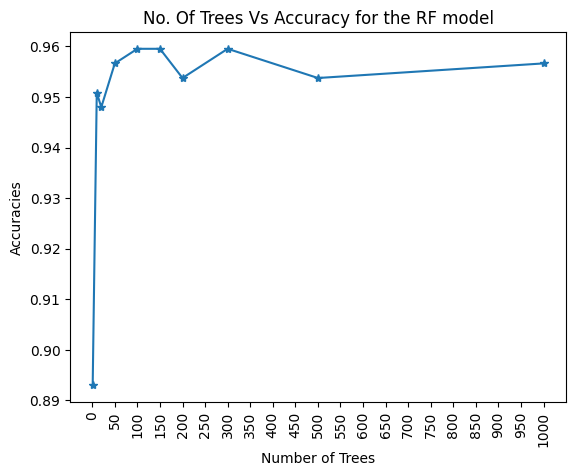

In [78]:
plt.plot(ntrees,accuracies,marker = "*")
plt.xlabel("Number of Trees")
plt.xticks(np.arange(0,1001,50),rotation = 90)
plt.ylabel("Accuracies")
plt.title("No. Of Trees Vs Accuracy for the RF model")
plt.show()

In [80]:
fi = rfc.feature_importances_
fi

array([0.19940279, 0.12673035, 0.06090198, 0.24108242, 0.08127966,
       0.2906028 ])

In [82]:
cols = X_train.columns
cols

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

<BarContainer object of 6 artists>

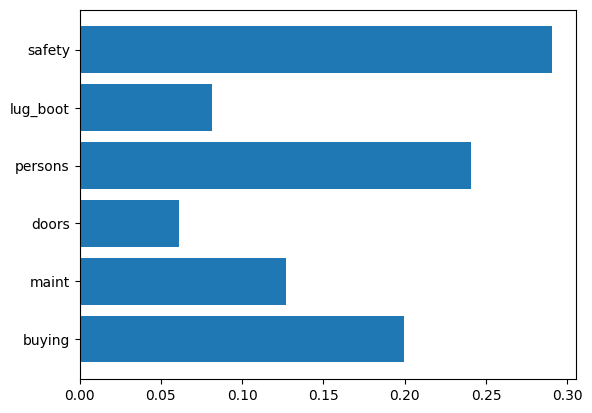

In [83]:
plt.barh(cols,fi)

In [108]:
rf = RandomForestClassifier(n_estimators = 250)
    #fit the model 
rf.fit(X_train,y_train)

 #predict the Test set results 
y_pred = rf.predict(X_test)

    #choice accuracy score 
acc = accuracy_score(y_test,y_pred)
    

In [111]:
a = round(acc,2)*100 
print(a,"%")

95.0 %
